# Introduction: Fully Connected Neural Networks
# Angel Sarmiento


## Typical steps for image classification using fully connected networks (FCNs)

- **To get started Image Classification with tensorflow 2 **

- Following steps were performed in order to achieve the end results and improve the accuracy :
   - [x] Encoded the labels.
   - [x] Understood neural networks.
   - [x] Preprocessed image examples.
   - [x] Created a neural network model.
   - [x] Trained the model to fit the dataset.
   - [x] Evaluated the model.
   - [x] Visualized the predictions.

In [1]:
import tensorflow as tf 

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


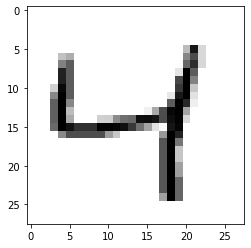

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[2], cmap = 'binary')
plt.show()

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.32718918,  0.3363179 ,  0.6077106 , -0.27276683,  0.50873816,
        -0.39717093,  0.02770857, -0.17896482, -0.34886009, -0.21821922]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.1250348 , 0.12618144, 0.16552356, 0.06862357, 0.14992589,
        0.06059619, 0.09267619, 0.07537217, 0.06359551, 0.0724708 ]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.8035233

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4885 - accuracy: 0.8571
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1500 - accuracy: 0.9553
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1055 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0835 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0731 - accuracy: 0.9770


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0717 - accuracy: 0.9784


[0.07167226076126099, 0.9783999919891357]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.59257834e-08, 3.23885523e-08, 1.37285826e-06, 1.67756371e-05,
        4.70581430e-12, 4.80266010e-07, 2.32080999e-12, 9.99980569e-01,
        1.09460796e-08, 6.83677058e-07],
       [2.77949059e-08, 5.33293700e-04, 9.99450505e-01, 1.36902045e-05,
        1.58246707e-13, 1.65945664e-06, 1.10025118e-08, 8.16563343e-13,
        8.87634258e-07, 1.16758664e-12],
       [2.47338363e-07, 9.99260843e-01, 7.96247114e-05, 1.18870037e-06,
        9.29412909e-06, 7.07325762e-06, 1.33961555e-06, 5.17170934e-04,
        1.21984333e-04, 1.15830835e-06],
       [9.99870300e-01, 3.61756158e-09, 1.04198050e-04, 5.23777828e-07,
        1.09369012e-08, 9.97793086e-06, 8.52670200e-06, 4.92941035e-06,
        7.04575100e-08, 1.48942286e-06],
       [3.04880609e-06, 5.14282172e-10, 1.52847479e-05, 1.23987348e-07,
        9.88731802e-01, 1.29014765e-07, 8.06410696e-07, 5.13989071e-04,
        4.03403618e-07, 1.07343886e-02]], dtype=float32)>

### Extra Questions:

*Research about the Dropout layer in the TensorFlow 2 example.  Why the Tensor 2 standardize the data (divide by 255) while the version 1 normalize  (x -mean)/sdt ?.  Study every single step, and implement in PyTorch the second example (the one using TensorFlow 2).*


The Dropout layer is used to prevent overfitting from the Dense layers, it essentially trains the model with random neurons activating while others are 'off'. The values need to be divided by 255 so that they are normalized and are all between 0 and 1. The number is specifically 255 because that is the number of values for greyscale values for pixels. This is so sigmoid-style functions do not have too negative values that would produce errors in later layers. 

# Pytorch Implementation



In [19]:
import torch
import torchvision
from torchsummary import summary
import os

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# setting some parameters
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

# seed for reproducability
random_seed = 1
torch.manual_seed(random_seed)

In [21]:
# importing the data

# training data
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('~/.keras/datasets/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

# testing data
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('~/.keras/datasets/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [22]:
#building the network 
# This is a structure I found online, it includes dropout layers as well as the dense layers included above. I think the two convolutional layers will help it perform better
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    # defining the forward step as a method
    def forward(self, x):
        # max pooling on the convolution layers
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [23]:
torch_net = Net()
optimizer = optim.Adam(torch_net.parameters(), lr = learning_rate)

In [24]:
summary(torch_net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
            Conv2d-2             [-1, 20, 8, 8]           5,020
         Dropout2d-3             [-1, 20, 8, 8]               0
            Linear-4                   [-1, 50]          16,050
            Linear-5                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.08
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


In [25]:
# creating lists for appending values to plot later
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range( n_epochs + 1)]

range(0, 4)

In [26]:
# Training function 
def train(epoch):
  torch_net.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    # setting the gradient to zero 
    optimizer.zero_grad()
    output = torch_net(data)

    #calculating the loss using negative log likelihood
    loss = F.nll_loss(output, target)

    # moving backward and altering the parameters with the adam optimizer
    loss.backward()
    optimizer.step()

    # every 10 batches
    if batch_idx % log_interval == 0:
        # using f strings to print loss and epoch/batch numbers
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

        #appending the loss values to the list defined above
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

        # can save to a file, however lets not waste the space for the file submission
      #torch.save(torch_net.state_dict(), '/results/model.pth')
      #torch.save(optimizer.state_dict(), '/results/optimizer.pth')

# function to get test set loss 
def test():
  torch_net.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in test_loader:
      output = torch_net(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)

  #another print statement to get the test loss
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [27]:
from beepy import beep
# evaluate the model with uninitialized parameters
test()

#loop to execute the model 
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()
beep(sound = 'coin')


Test set: Avg. loss: 2.3316, Accuracy: 1137/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.382142
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.121723
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.614097
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.457011
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.516817
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.333079
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.151820
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.988950
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.922488
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.313614
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.202865
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.882614
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.795777
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.127547
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.641486
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.083544
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.095578
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.922196
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.141478
Train Epoch: 1 [12160

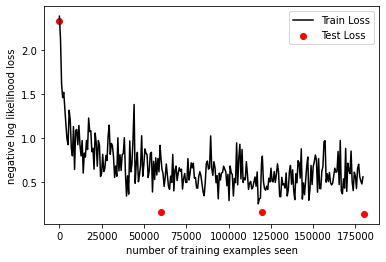

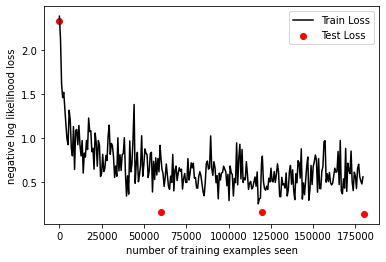

In [31]:
#plotting
fig = plt.figure()
plt.plot(train_counter, train_losses, color='black')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig